# National Youth Tobacco Survey Analysis

Tobacco use has long been a common activity amongst citizens in the United States. Although, in the past several decades, ciggarette smoking has lost its appeal as the health dangers of the activity have been extensiley documented, reserched, and uncovered. Still, smoking has not disappeared entirely and those who do smoke find it difficult to kick the habit. The market's answer to this dilemma was the invention of the electronic cigarrette. E-cigarrette is a small device that administers nicotine to the user via a, often flavored, liquid vapor. The idea was to provide the raw product that smokers are really after, the nicotine, while eliminating the other harmful chemicals and ingredients commonly included in regular cigarettes. As more adults see e-cigarrettes as better alternatives to cigarrettes, some argue that so do teens and young adults. Due to the wide variety of flavored juices available for e-cigarettes, some believe that although smoking is decreasing, vaping is on the rise; specifically, amongst teens and young adults. 

The Center for Disease Control (CDC) is a branch of the U.S. government that is concerned with the issue of national public health. The CDC conducts a yearly survey called the 'National Youth Tobacco Use Survey' which seeks to guage the smoking habits of adolescents, teens, and young adults across the U.S. The aim of this analysis is to explore the results of the survey for the years of 2015-2017. We'll be considering questions such as how has the rate of smoking, in general, changed with the rate of vaping?, are there any demographics that are more succeptible to smoking? Is smoking really increasing amongst the country's youth as a result of e-cigarrettes? and more. 

Click on the links below to jump to a particular step in the project: 

  * [General Data Cleaning & Exploration](#General-Data-Cleaning-&-Exploration)
  
  * [Demographic Results](#Demographic-Results)
  
  * [Cleaning Survey Data](#Cleaning-Survey-Data)
  
  * [Survey Data Results](#Survey-Data-Results)
      
      * [Cigarette Usage](#Cigarette-Usage)
      
      * [E-Cigarette Usage](#E-Cigarette Usage)
      
      * [Tobacco Procurement](#Tobacco-Procurement)
      
      * [Harm Perception](#Harm-Perception)
      
      * [Media Influence](#Media-Influence)
      
      * [Social Influence](#Social-Influence)
   
  * [Conclusion](#Conclusion)

In [102]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import warnings
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
nyts2015_df = pd.read_csv('nyts2015.csv')
nyts2016_df = pd.read_csv('nyts2016.csv')
nyts2017_df = pd.read_csv('nyts2017.csv')

## General Data Cleaning & Exploration

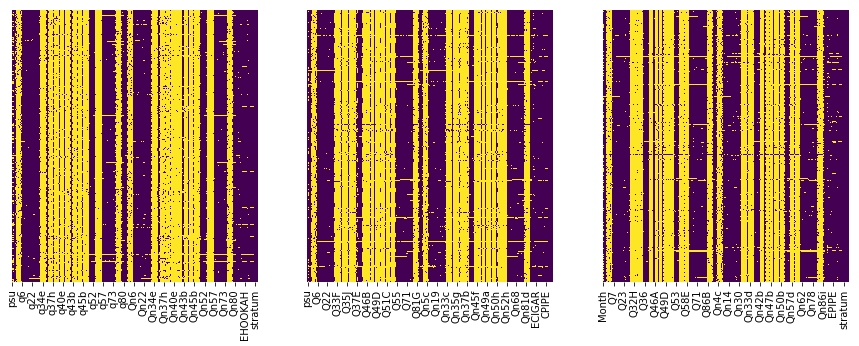

In [4]:
# Visualize missing data

f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.heatmap(nyts2015_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[0])
sns.heatmap(nyts2016_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[1])
sns.heatmap(nyts2017_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[2])

Based on the documentation provided for the data, It seems like '.' and 'E' are used to denote missing and inconsistent responses respectively. For the purposes of convenience and accuracy, we will consider both of these to be missing data. This will make cleaning the data much quicker seeing as all characters that were not numeric were converted into 'NULL' values in the dataset upon importation to the python environment. The number zero will symbolize that data is missing or should not be included in the analysis. 

In [3]:
# Replacing missing values with 'missing'.

nyts2015_df = nyts2015_df.fillna(999)
nyts2016_df = nyts2016_df.fillna(999)
nyts2017_df = nyts2017_df.fillna(999)

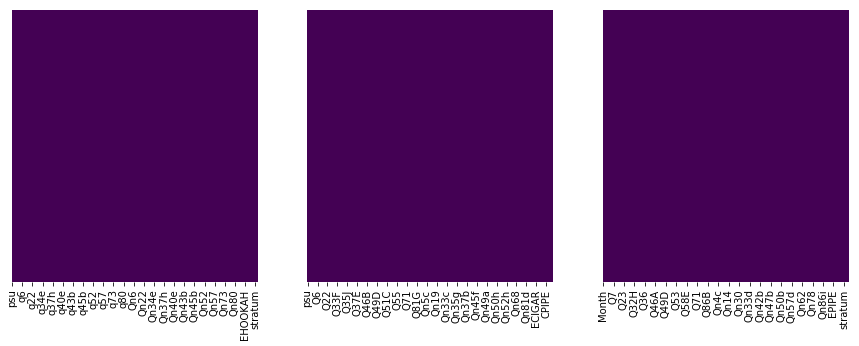

In [6]:
# Checking if missing data remains

f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.heatmap(nyts2015_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[0])
sns.heatmap(nyts2016_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[1])
sns.heatmap(nyts2017_df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis', ax=axes[2])

In [4]:
nyts2015_df['year'] = 2015
nyts2016_df['year'] = 2016
nyts2017_df['year'] = 2017

In [5]:
# Cleaning up demographic data.

nyts2015_df.drop('psu', axis=1, inplace=True)
nyts2016_df.drop('psu', axis=1, inplace=True)

year_list = [nyts2015_df, nyts2016_df, nyts2017_df]

for df in year_list:
    df.iloc[:,2] = df.iloc[:,2].replace({'*': 999, '**': 999})
    df.iloc[:,3] = df.iloc[:,3].replace({'*': 999})
    df.iloc[:,4] = df.iloc[:,4].replace({'*': 999})
    df.iloc[:,5] = df.iloc[:,5].replace({999: 0})
    
    for i in range(2,15):
        df.iloc[:,i] = df.iloc[:,i].astype(str).astype(float).astype(int)
        
    df['q4'] = df.iloc[:,5].astype(str)

    for i in range(2,15):
        df.iloc[:,i] = df.iloc[:,i].astype(str)

    df['age'] = df.iloc[:,2].sort_values().replace({'9': 17, '10': 18, '11': 19, '1': 9, '2': 10, '3': 11, '4': 12, 
                                      '5': 13, '6': 14, '7': 15,'8': 16, '999': 0})
    
    df['sex'] = df.iloc[:,3].replace({'1': 'Male', '2': 'Female', '999': 'Missing'})
    
    df['grade'] = df.iloc[:,4].sort_values().replace({'6': 11, '7': 12, '1': 6, '8': 1, '2': 7, 
                                        '3': 8, '4': 9, '5': 10, '999': 0})
 
    df.iloc[:,10] = df.iloc[:,10].replace({'1': 'American Indian/Alaska Native ', '999': ''})
    df.iloc[:,11] = df.iloc[:,11].replace({'1': 'Asian ', '999': ''})
    df.iloc[:,12] = df.iloc[:,12].replace({'1': 'Black/African American ', '999': ''})
    df.iloc[:,13] = df.iloc[:,13].replace({'1': 'Native Hawaiian or Other Pacific Islander ', '999': ''})
    df.iloc[:,14] = df.iloc[:,14].replace({'1': 'White ', '999': ''})
    df['q4'] = df['q4'].replace({'0': 'Hispanic ', '1': ''})
    
    df['race'] = df.iloc[:,10:15].sum(axis=1) + df['q4']
    df['race'] = df['race'].replace({'': 'Other '})

Let's explore the demographics data in our dataset.

In [7]:
# Creates a holistic dataframe containing all the years

def make_df(list_15, list_16, list_17):
    
    df_15 = nyts2015_df[list_15]
    df_16 = nyts2016_df[list_16]
    df_17 = nyts2017_df[list_17]

    df_16.columns = list_15
    df_17.columns = list_15

    final_df = pd.concat([df_15,df_16,df_17], axis=0)

    return(final_df)

In [8]:
# Create countplots for each year (2015-2017) of a variable

def countplot_yearly(df, col, title, xlabel, ylabel, bar = None, bar_color = None):
    
    sns.set_style("darkgrid")
    f, axes = plt.subplots(1, 3, figsize=(20,10))
    axes = axes.flatten()
    ap_1 = sns.countplot(df.loc[df['year'] == 2015, col].sort_values(), ax=axes[0], color='#1E90FF')
    ap_2 = sns.countplot(df.loc[df['year'] == 2016, col].sort_values(), ax=axes[1], color='#1E90FF')
    ap_3 = sns.countplot(df.loc[df['year'] == 2017, col].sort_values(), ax=axes[2], color='#1E90FF')
    ft = f.suptitle(title, weight='bold', size=20)
    plt.subplots_adjust(top=0.88, bottom=0.15, wspace=.3)
    cxl = f.text(0.5, 0.04, xlabel, ha='center', weight='bold', size=20)
    cyl = f.text(0.04, 0.5, ylabel, va='center', rotation='vertical', weight='bold', size=20)

    year = 2015
    for i in range(0,3):
        axl = axes[i].set_xlabel('')
        ayl = axes[i].set_ylabel('')
        atl = axes[i].set_title('%i' % year, weight='bold', size=20)
        atp = axes[i].tick_params(labelsize=15)
        year += 1
    
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(45)
        
        if bar is None:
            pass
        else:
            for j in range(0,len(bar)):
                k = bar[j]
                apbc_1 = axes[i].get_children()[k].set_color(bar_color[j])

In [9]:
# Create horizontal countplots for each year (2015-2017) of a variable

def horizontal_barplot(x, x_label, y_label, title):
    ax = x.plot(kind='barh', figsize=(15, 5), color='#1E90FF', zorder=2, width=0.85)

  # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

  # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="on", top="off", labelbottom="on", left="off", right="off", 
                   labelleft="on", labelsize="large")

  # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.1, color='black', zorder=1)

  # Set x-axis label
    ax.set_xlabel(x_label, labelpad=20, weight='bold', size=20)
  
  # Set x-axis limit          
    plt.xlim([0,10000])

  # Set y-axis label
    ax.set_ylabel(y_label, labelpad=20, weight='bold', size=20)
    
  # Set title label
    ax.set_title(title, weight='bold', size=20)
    
 # Set tick label size
    ax.tick_params(labelsize=15)
    
    return(ax)

In [10]:
demo_15 = ['year', 'State_Code', 'age', 'sex', 'grade', 'race']
demo_16 = ['year', 'State_Code', 'age', 'sex', 'grade', 'race']
demo_17 = ['year', 'State_Code', 'age', 'sex', 'grade', 'race']
demo_df = make_df(demo_15, demo_16, demo_17)

In [11]:
demo_race_15 = pd.DataFrame(demo_df.loc[demo_df['year'] == 2015].groupby('race').size()).reset_index()
demo_race_15.set_index('race', inplace=True)
demo_race_16 = pd.DataFrame(demo_df.loc[demo_df['year'] == 2016].groupby('race').size()).reset_index()
demo_race_16.set_index('race', inplace=True)
demo_race_17 = pd.DataFrame(demo_df.loc[demo_df['year'] == 2017].groupby('race').size()).reset_index()
demo_race_17.set_index('race', inplace=True)

## Demographic Results

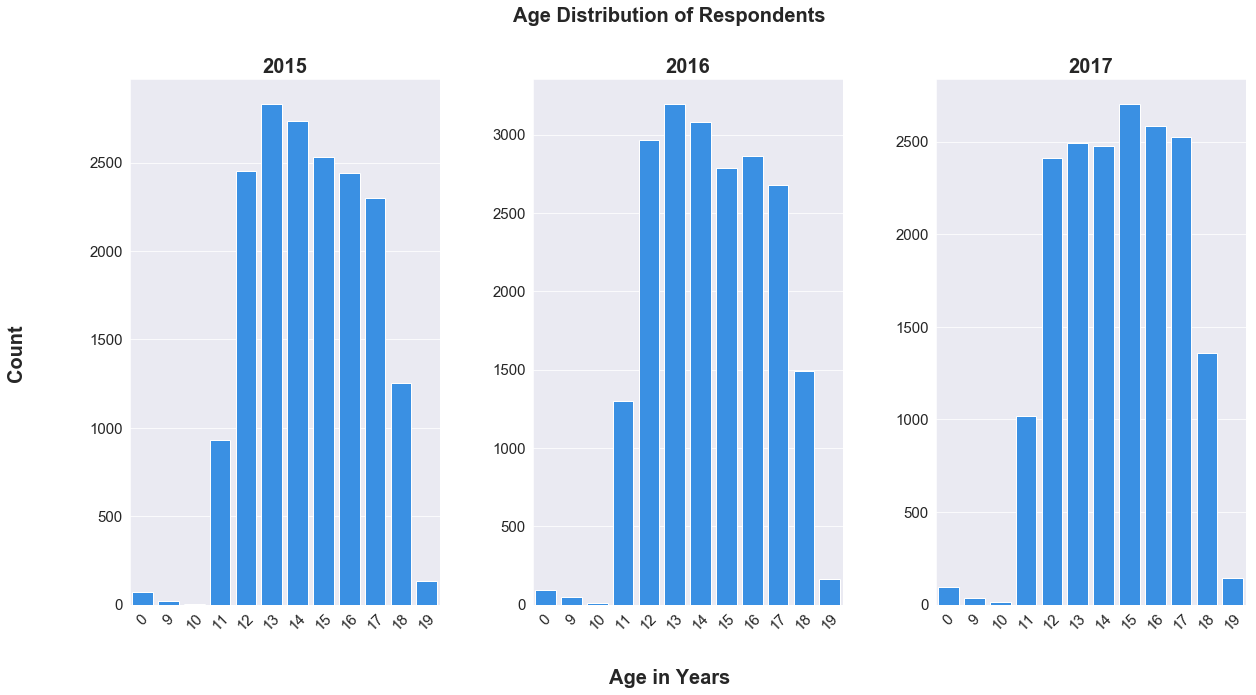

In [12]:
fig = countplot_yearly(demo_df, 'age', 'Age Distribution of Respondents', 'Age in Years', 'Count')

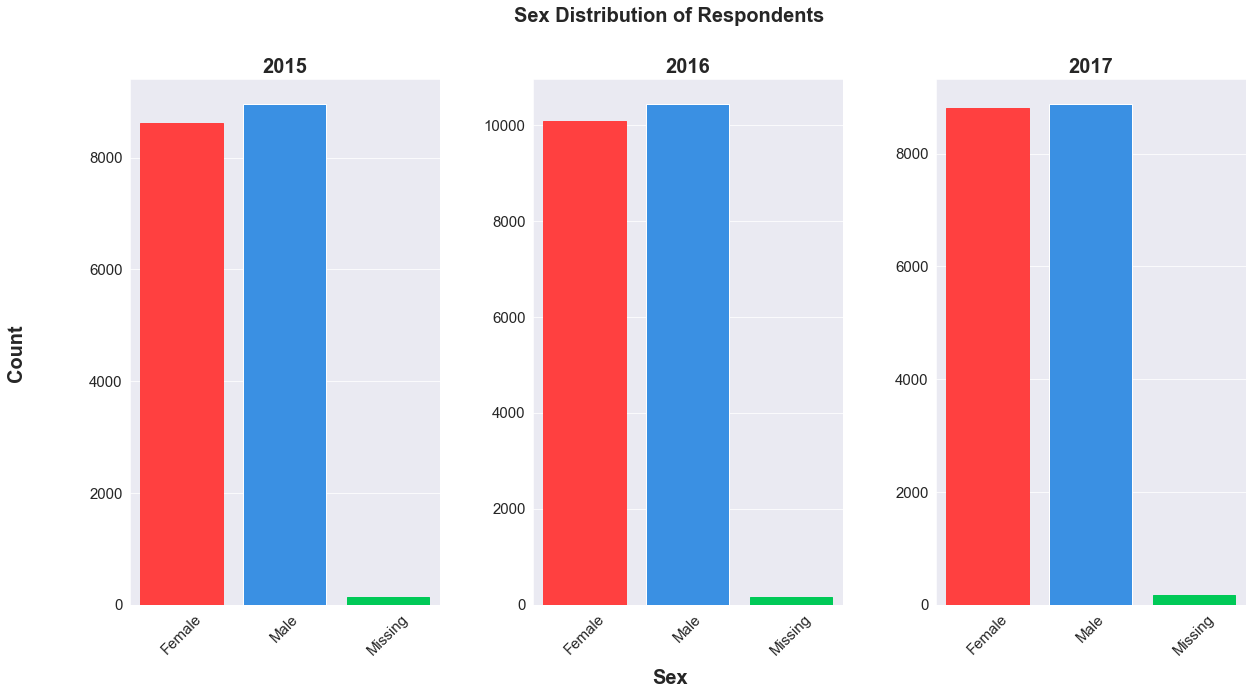

In [13]:
countplot_yearly(demo_df, 'sex', 'Sex Distribution of Respondents', 'Sex', 'Count', bar=[0,2], bar_color=['#FF4040', '#00C957'])

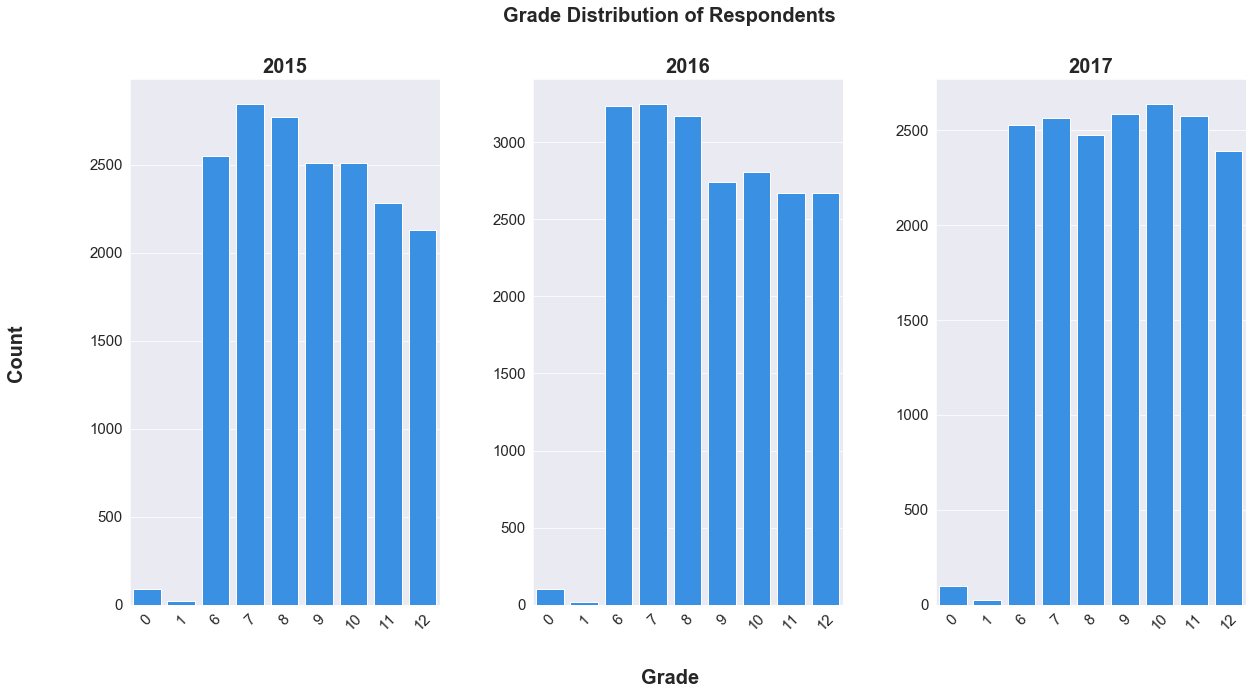

In [14]:
countplot_yearly(demo_df, 'grade', 'Grade Distribution of Respondents', 'Grade', 'Count')

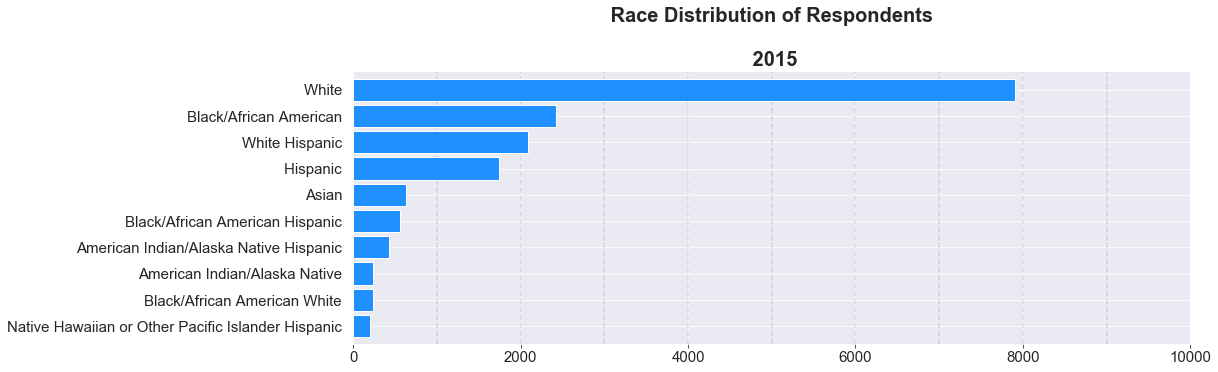

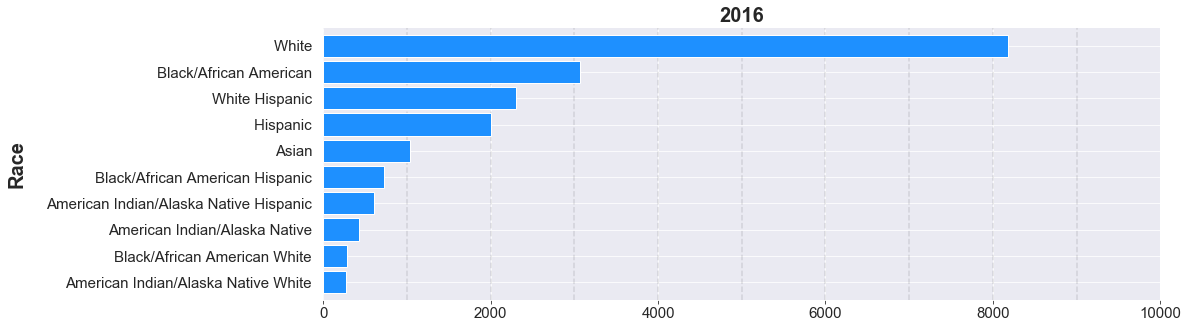

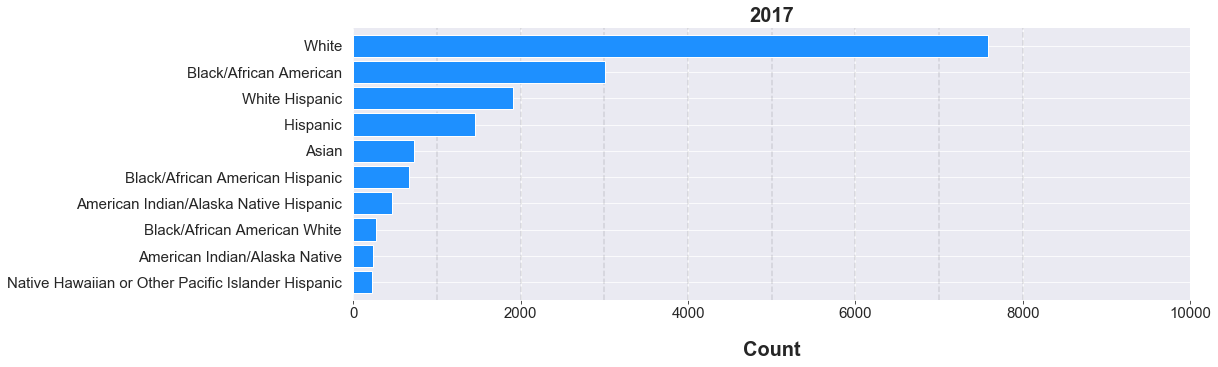

In [15]:
InteractiveShell.ast_node_interactivity = 'all'

horizontal_barplot(demo_race_15[0].sort_values().tail(10), '', '', ' Race Distribution of Respondents \n\n 2015')
plt.show();
horizontal_barplot(demo_race_16[0].sort_values().tail(10), '', 'Race', '2016')
plt.show();
horizontal_barplot(demo_race_17[0].sort_values().tail(10), 'Count', '', '2017')
plt.show();

## Cleaning Survey Data

In [135]:
# Quick clean of dataframe

def quick_clean(df):
    
    for i in range(0,len(df.columns)):
        df.iloc[:,i] = df.iloc[:,i].astype(str)
        df.iloc[:,i] = df.iloc[:,i].replace({'*': '999', '**': '999'})
        df.iloc[:,i] = df.iloc[:,i].astype(float).astype(int).astype(str)
            
    #return(df)

In [71]:
# Print the unique values in each column of a dataframe

def get_unique_vals(df):
    
    for col in df:
        print(col, df[col].unique())

Now, let's clean up all of the questions we have chosen for our analysis and then use Tableaue for our visualizations.

Ideally, we would like to analyze those survey questions which remain constant across all three years. This way, we would be able to directly determine the changes in the responses across time. It is for this reason that 2015 survey questions are used as our base questions against which we compare all other questions from later years. We will select the questions of most interest to us from the 2015 survey and match them across the later years. Questions and responses will be seperated into 6 categories as follows: Cigarette Usage, E-Cigarette Usage, Tobacco Procurement, Harm Perception, Media Influence, and Social Influence.

In [150]:
# Initializing the list of dataframes

df_list = []
df_list.append(demo_df)

**Cigarette Usage Questions**

'q6' - Have you ever tried cigarette smoking?

'q8' - Do you think that you will try a cigarette soon?

'q9' - If one of your best friends were to offer you a cigarette, would you
       smoke it?

'q10' - How old were you when you first tried a cigarette?

'q12' - During the past 30 days, on how many days did you smoke cigarettes?

'q16' - Menthol cigarettes are cigarettes that taste like mint. During the past 30
        days, were the cigarettes that you usually smoked menthol?

In [151]:
ciguse_15 = ['q6', 'q8', 'q9', 'q10', 'q12', 'q16']
ciguse_16 = ['Q7', 'Q8', 'Q10', 'Q11', 'Q13', 'Q17']
ciguse_17 = ['Q7', 'Q15', 'Q17', 'Q8', 'Q12', 'Q14']
ciguse_df = make_df(ciguse_15, ciguse_16, ciguse_17)

quick_clean(ciguse_df)

df_list.append(ciguse_df)

**Electronic Cigarette Usage Questions**

'q28' - Have you ever used an electronic cigarette or e-cigarette, even once or
        twice?
        
'q31' - How old were you when you first tried using an electronic cigarette or e-cigarette, even once or twice?
        
'q32' - During the past 30 days, on how many days did you use electronic
        cigarettes or e-cigarettes?
        
'q37' (ALL) - Reasons why started using e-cigs

In [153]:
nyts2015_df['mq37'] = 999

eciguse_15 = ['q28', 'q31', 'q32', 'q37a', 'q37b', 'q37c', 'q37d', 'mq37', 'q37e', 'q37f', 'q37g', 'q37h', 'q37i']
eciguse_16 = ['Q26', 'Q30', 'Q31', 'Q36A', 'Q36B', 'Q36C', 'Q36D', 'Q36E', 'Q36F', 'Q36G', 'Q36H', 'Q36I', 'Q36J']
eciguse_17 = ['Q28', 'Q29', 'Q31', 'Q33A', 'Q33B', 'Q33C', 'Q33D', 'Q33E', 'Q33F', 'Q33G', 'Q33H', 'Q33I', 'Q33J']
eciguse_df = make_df(eciguse_15, eciguse_16, eciguse_17)

quick_clean(eciguse_df)

df_list.append(eciguse_df)

**Obtaining/Using Tobacco Questions**

'q43' (ALL) - During the past 30 days, how did you get your own tobacco products?

'q44' (ALL) - During the past 30 days, where did you buy your own tobacco products?

'q46' - During the past 30 days, did anyone refuse to sell you any tobacco products because of your age?

In [154]:
obtaincigs_15 = ['q43a', 'q43b', 'q43c', 'q43d', 'q43e', 'q43f', 'q43g', 'q43h', 'q44a', 'q44b', 'q44c', 'q44d', 
                 'q44e', 'q44f', 'q44g', 'q44h', 'q46']
obtaincigs_16 = ['Q51A', 'Q51B', 'Q51C', 'Q51D', 'Q51E', 'Q51F', 'Q51G', 'Q51H', 'Q52A', 'Q52B', 'Q52C', 'Q52D', 
                 'Q52E', 'Q52F', 'Q52G', 'Q52H', 'Q53']
obtaincigs_17 = ['Q57A', 'Q57B', 'Q57C', 'Q57D', 'Q57E', 'Q57F', 'Q57G', 'Q57H', 'Q58A', 'Q58B', 'Q58C', 'Q58D', 
                 'Q58E', 'Q58F', 'Q58G', 'Q58H', 'Q59']
obtaincigs_df = make_df(obtaincigs_15, obtaincigs_16, obtaincigs_17)

quick_clean(obtaincigs_df)

df_list.append(obtaincigs_df)

**Harm Perception Towards Use of Tobacco and E-Cigarette Products**

'q56' - How much do you think people harm themselves when they smoke cigarettes some days but not every day?

'q59' - How much do you think people harm themselves when they use e-cigarettes some days but not every day?

'q60' -  How strongly do you agree with the statement ‘All tobacco products are dangerous’?

'q61' - Do you think that breathing smoke from other people’s cigarettes or other tobacco products causes...?

In [155]:
harmperc_15 = ['q56', 'q59', 'q60', 'q61']
harmperc_16 = ['Q61', 'Q64', 'Q68', 'Q69']
harmperc_17 = ['Q65', 'Q68', 'Q72', 'Q73']
harmperc_df = make_df(harmperc_15, harmperc_16, harmperc_17)

quick_clean(harmperc_df)

df_list.append(harmperc_df)

**Percieved Prevalence of E-Cigarette Advertisements**

'q69' - When you are using the internet, how often do you see ads or promotions for electronic cigarettes or e-cigarettes?

'q70' - When you read newspapers or magazines, how often do you see ads or promotions for electronic cigarettes or e-cigarettes? 

'q71' - When you go to a convenience store, supermarket, or gas station, how often do you see ads or promotions for electronic cigarettes or e-cigarettes? 

'q72' - When you watch TV, how often do you see ads or promotions for electronic cigarettes or e-cigarettes?.

In [156]:
mediaperc_15 = ['q69', 'q70', 'q71', 'q72']
mediaperc_16 = ['Q73', 'Q74', 'Q75', 'Q76']
mediaperc_17 = ['Q78', 'Q79', 'Q80', 'Q81']
mediaperc_df = make_df(mediaperc_15, mediaperc_16, mediaperc_17)

quick_clean(mediaperc_df)

df_list.append(mediaperc_df)

**Social Exposure to Tobacco and E-Cigarette Products**

'q73' - During the past 7 days, on how many days did someone smoke tobacco products in your home while you were there? 

'q74' - During the past 7 days, on how many days did you ride in a vehicle where someone was smoking a tobacco product? 

'q75' - During the past 30 days, on how many days did you breathe the smoke from someone who was smoking tobacco 
        products in an indoor or outdoor public place? Examples of indoor public places are school buildings, stores, 
        restaurants, and sports arenas. Examples of outdoor public places are school grounds, parking lots, stadiums 
        and parks

'q76' - During the past 30 days, on how many days did you breathe the smoke from someone who was smoking e-cigarette 
        products in an indoor or outdoor public place? Examples of indoor public places are school buildings, stores, 
        restaurants, and sports arenas. Examples of outdoor public places are school grounds, parking lots, stadiums 
        and parks

'q77' (ALL) - Does anyone who lives with you now...?

'q81' - Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?

In [157]:
socialinf_15 = ['q73', 'q74', 'q75', 'q76', 'q77a', 'q77b', 'q77c', 'q77d', 'q77e', 'q77f', 'q77g', 'q77h', 'q77i', 
                'q77j', 'q81']
socialinf_16 = ['Q77', 'Q78', 'Q79', 'Q80', 'Q81A', 'Q81B', 'Q81C', 'Q81D', 'Q81E', 'Q81F', 'Q81G', 'Q81H', 'Q81I',
                'Q81J', 'Q83']
socialinf_17 = ['Q82', 'Q83', 'Q84', 'Q85', 'Q86A', 'Q86B', 'Q86C', 'Q86D', 'Q86E', 'Q86F', 'Q86G', 'Q86H', 'Q86I',
                'Q86J', 'Q88']
socialinf_df = make_df(socialinf_15, socialinf_16, socialinf_17)

quick_clean(socialinf_df)

df_list.append(socialinf_df)

In [158]:
# Putting all the dataframes into a single dataframe

df_final = pd.concat(df_list, axis=1)

In [159]:
df_final.to_csv('NYTS_final.csv', sep=',')

## Survey Data Results

### Cigarette Usage

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1543600396961' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5P&#47;5PJ855YK6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;5PJ855YK6' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5P&#47;5PJ855YK6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543600396961');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For our first question, we analyze the percent of respondents, by age group, who responded "Yes" to the question of whether or not they have ever tried a cigarette. Unsurprisingly, the older age groups harbor proportionately larger amounts of people who have tried a cigarette before. This is most likely a result of an increase in risk-taking behavior, as age increases, as well as the fact that those persons of greater age have lived longer giving them more time to acquire certain experiences, such as smoking. Of note here is the sudden drop in proportion of respondents for the 19 year old age group. This is likely a result of the age group having a relatively low sample size compared to all of the other age groups. This particular group of 19 year olds may be a biased sample of those who have never smoked, cigarettes, before. We see a steady decline in the proportion of individuals participating in cigarette smoking from 2015-2017. The proportion of some of the age groups increased from 2015-2016 but virtually all experienced a sharp decline from 2016-2017.

Moving on to questions 2 and 3, we see similar increases in the proportion of individuals willing to try a cigarette from '15 - '16 followed by a sharp decrease from '16 - '17.

In question 4, respondents answer at what age they tried their first cigarette. A majority of the respondents seem to have tried their first cigarette between the ages of 12 and 16. Although, it seems like response rates have fallen across all choices, between 2015 and 2017. This signals an increase in the only other answer available on the survey, which has been omitted here, which is "I have never tried a cigarette". So, it seems like fewer survey respondents have tried cigarettes in 2017 than they did in 2016.

We have a similar pattern emerge in question 5 when young adults were asked how often they have used cigarettes in the last 30 days. A decrease in response rate is exhibited across the board. Interestingly enough, although decreses are seen overall, there is an increase in persons who have used cigarettes 3-5 and 6-9 times in the past month. This may mean that although there are more individuals who have not smoked at all in the past month, there may also be a concurrent increase in the frequency of smoking amongst those who already do smoke.

Finally, it looks as if most young adults who have smoked in the last 30 days did not use menthol, mint flavored, cigarettes.

### E-Cigarette Usage

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1543603173595' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;28&#47;28WN6W2Y6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;28WN6W2Y6' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;28&#47;28WN6W2Y6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543603173595');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here, we shift our focus from tobacco based cigarettes to electronic cigarettes. The first question probes whether respondents have ever tried an e-cigarette. Most respondents have not. Yet, amongst those who have, there is a clear, steady decrease, amongst all age groups, of young adults who respond "yes" in this question. The proportions themselves seem to closely resemble those of the same question, but for tobacco cigarettes, in the previous section of 'Cigarette Usage' questions.

The second question asks when the respondent first tried an electronic cigarette. Here a majority of respondents fell within the 13-17 age range exhibiting a much more normal-looking distribution of responses relative to those we saw for a similar question regarding tobacco cigarettes. In addition, we, again, see that fewer and fewer respondents are trying e-cigarettes. Yet, it seems as if there are more young adults trying e-cigarettes than there are young adults trying tobacco cigarettes. Upon calculation, in 2017, about 17.8% of respondents indicate that they have tried smoking a cigarette at some point in their lives while 21.3% of respondents indicate that they have tried smoking an e-cigarette at some point in their lives.

In the third question, the survey prods deeper in the e-cigarette smoking habits of young adults questioning how often, within the last 30 days, have respondents smoked an e-cigarette. We see a decrease in responses, other than 0, from 2015 to 2016 but virtually no change between 2016 and 2017. In addition, the responses for e-cigarettes seem skewed to the right with a majority of e-cigarette users doing so occasionally. Upon calculation, it is determined that, in 2017, 6.5% of respondents had used cigarettes in the past 30 days compared to 8% who have used e-cigarettes in the same amount of time. 

In the final question of this section, we find out the reasons behind the choices of young adults using e-cigarettes. The two most popular responses, in 2017, were either the respondent had a family member who uses/used an e-cigarette, they are less harmful than traditional cigarettes, or they can be used in areas where traditional cigarettes are not allowed. 

### Tobacco Procurement

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1543607721023' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;DK&#47;DKKWPTGFT&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;DKKWPTGFT' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;DK&#47;DKKWPTGFT&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543607721023');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1116px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here, the survey explores how young adults are obtaining cigarettes. Most cigarette users report they obtained their cigarettes either on their own, they were offered cigarettes by someone they knew, or they had someone buy the cigarettes for them; all in about equal proportions. Most cigarettes were bought from gas stations and most cigarette users have not been refused cigarettes because of their age. This is most likely because the respondents procured their cigarettes by means other than buying them from a store.

### Harm Perception

In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1543608263939' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RX&#47;RX3GBHRFF&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;RX3GBHRFF' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RX&#47;RX3GBHRFF&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543608263939');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here, we discover how much harm young adults believe that cigarettes and e-cigarettes cause to the users and those around them. According the the responses, over 80% of respondents believe that smoking cigarettes causes either some or a lot of harm. This is compared to ~62.5% who believe that e-cigarettes cause a lot or some harm. Although, of note is that most respondents believe cigarettes cause a lot of harm while, at the same time, believing that e-cigarettes cause some harm. From the third question, we see that ~86% of respondents either agree or strongly agree with the statement that all tobacco products are dangerous. Although, it is unclear whether e-cigarettes are included in the categorization of 'tobacco products'.

### Media Influence

In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1543609061118' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYTS_tableau&#47;MediaInfluence&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NYTS_tableau&#47;MediaInfluence' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NY&#47;NYTS_tableau&#47;MediaInfluence&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543609061118');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

This section of questions explores the impact various forms of social and entertainment media have had on the sale of e-cigarettes to young adults. We see similar responses from 2015-2016 with most respondents rarely seeing e-cigarette based ads on the internet. In 2017, there is a sharp transition of respondents seeing e-cigarette ads rarely and sometimes to never on the internet. The same is true for covenience stores/supermarkets and television. 

### Social Influence

In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1543609611144' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;63&#47;633ZRBFR4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;633ZRBFR4' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;63&#47;633ZRBFR4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1543609611144');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Reviewing the results of the questions above, we see that young adults are being exposed to traditional cigarette smoke more than e-cigarette smoke in outdoor, public areas. In addition, of those individuals who live with a family member that smokes, a majority of them live with cigarette smokers, ~25%, as oppose to e-cigarette smokers, ~7%.

## Conclusion

After our analysis of the data, we can make several inferences from what we have seen thus far. First, there seems to be a decrease in the proportion of young adults smoking both tobacco cigarettes and electronic cigarettes. Yet, it looks like there are more respondents that have tried e-cigarettes than tobacco cigarettes. Most young adults that use e-cigarettes do so because they either have a family member who uses them or they believe that e-cigarettes are less harmful than other types of tobacco products. Overall, young adults, both those who use e-cigarettes and those who don't, believe that e-cigarettes are less harmful than tobacco cigarettes and not only relativley but objectivley as well. There seems to have been a sharp decline in the accessability of e-cigarette advertisements to young adults from 2016-2017. Young adults continue to experience more exposure to traditional tobacco cigarettes than to e-cigarettes both in the home and in outdoor, public places. 

What all of these findings together show, is that the rate of smoking amongst young adults is dropping overall but more young adults use e-cigarettes than they do tobacco cigarettes. Young adults have a more positive view of e-cigarettes than they do of other tobacco products. At the same time, while exposure to e-cigarettes is falling, most young adults are exposed to tobacoo cigarettes, and more often, than to their electronic counterparts. 

Two points of interest arise now, at the end of the analysis. The first being how many young adults who smoke cigarettes also smoke e-cigarettes. One of the biggest objections to e-cigarettes today are their allure to, and effect on, young adults. Some contend that the rate of smoking is rising amongst young adults because of e-cigarettes. As we see, this is not true as, overall, the rate of smoking has fallen, at least for the years 2015-2017, but of the respondents of the survey, more use e-cigarettes than do tobacco cigarettes. This does imply that there are some users of e-cigarettes that do not smoke regular cigarettes. Ideally, the goal would be to determine how many young adults are smoking today who would not be doing so if electronic cigarettes were unavailable. This is an intersting question but one that may prove to be unknowable or too difficult to pratically determine. 

The second point of interest is this analysis likley includes years in which legislation, that regulates the advertisement of the electronic cigarette industry, has been passed. This would explain the decrease in the prevalence of e-cigarette advertisements from 2016 to 2017. As a result, one can not completely determine just how influencial the e-cigarette industry was on young adults prior to the introduction and enforcement of legislative regulations. I would recommend to redo the analysis with a a wider time frame beginnning from the first introduction of e-cigarettes to the market. This analysis was hindered by the fact that the CDC began including questions about electronic cigarettes in 2015. As a result, e-cigarette usage among young adults was restricted to the period of 2015-2017.